## Gabriel Gomez

### Utilizing a Pulsar dataset from Kaggle in order to see if we can predict what stars are Pulsar and which are not

link: https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/downloads/predicting-a-pulsar-star.zip/1

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial.distance as dist
import scipy.stats as scs 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn import tree, metrics, naive_bayes, neighbors, utils
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import os

#### Importing data

In [2]:
names = ["IP_mean", "IP_std", "IP_kurtosis", "IP_skew", "DMSNR_mean", "DMSNR_std", "DMSNR_kurtosis",
         "DMSNR_skew", "target"]

path = os.getcwd() + "/data/pulsar_stars.csv"
df_pulsar = pd.read_csv(path, header=None, names = names, skiprows=1)

#### Data check and data cleanse

In [15]:
# Seems as though the data is within the data types we want already. No need to do any casting
print(df_pulsar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
IP_mean           17898 non-null float64
IP_std            17898 non-null float64
IP_kurtosis       17898 non-null float64
IP_skew           17898 non-null float64
DMSNR_mean        17898 non-null float64
DMSNR_std         17898 non-null float64
DMSNR_kurtosis    17898 non-null float64
DMSNR_skew        17898 non-null float64
target            17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


In [10]:
# Data has 17,898 rows, and 9 columns. Just as we expect it to have
print(df_pulsar.shape)

(17898, 9)


In [12]:
df_pulsar.describe()

,IP_mean,IP_std,IP_kurtosis,IP_skew,DMSNR_mean,DMSNR_std,DMSNR_kurtosis,DMSNR_skew,target
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [14]:
# No missing data within this dataset
print(df_pulsar.isna().sum())

IP_mean           0
IP_std            0
IP_kurtosis       0
IP_skew           0
DMSNR_mean        0
DMSNR_std         0
DMSNR_kurtosis    0
DMSNR_skew        0
target            0
dtype: int64


In [17]:
df_pulsar.head()

,IP_mean,IP_std,IP_kurtosis,IP_skew,DMSNR_mean,DMSNR_std,DMSNR_kurtosis,DMSNR_skew,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


#### EDA (Exploratory Data Analysis)

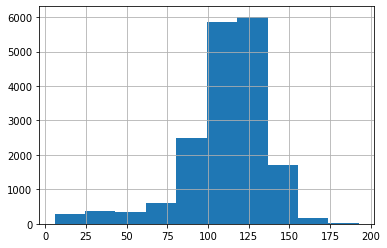

In [18]:
# Distribution of the mean of the integrated profile
df_pulsar.IP_mean.hist()
plt.show()

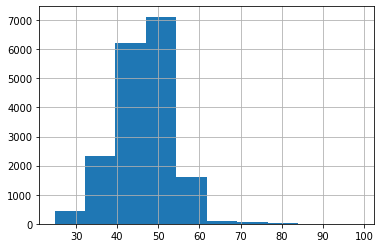

In [19]:
# Distribution of the standard deviation of the integrated profile
df_pulsar.IP_std.hist()
plt.show()

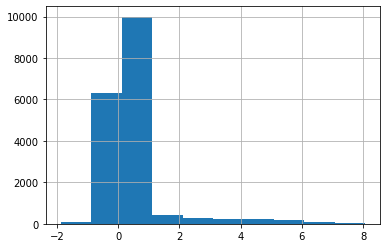

In [20]:
# Distribution of the kurtosis of the integrated profile. Important to note that in this dataset, kurtosis is given
# as "Excess Kurtosis"
# As can be seen, most recordings fall within the range of -2 and 2, statistically meaning that the most of the
# recordings are within a normal distribution since this is Excess Kurtosis measurements
df_pulsar.IP_kurtosis.hist()
plt.show()

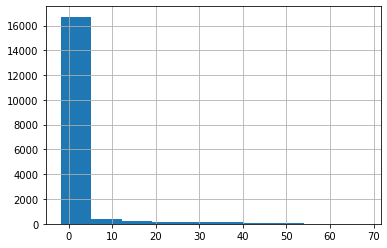

In [22]:
# Distribution of the skew of the integrated profile
# As can be seen, most recordings fall within, or close to 0, statistically meaning the distribution for most
# recordings are normal and symmetrical
df_pulsar.IP_skew.hist()
plt.show()

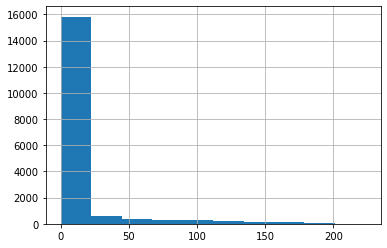

In [24]:
# Distribution of the mean of the DM_SNR
df_pulsar.DMSNR_mean.hist()
plt.show()

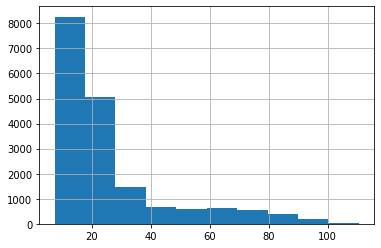

In [25]:
# Distribution of the standard deviation of the DM_SNR
df_pulsar.DMSNR_std.hist()
plt.show()

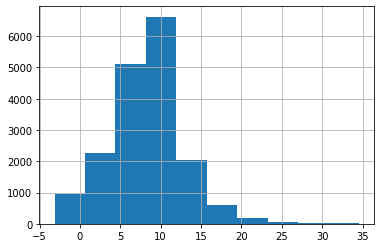

In [26]:
# Distribution of the kurtosis of the integrated profile. Important to note that in this dataset, kurtosis is given
# as "Excess Kurtosis"
# As can be seen, most recordings fall within the range of about 4 and 12, statistically meaning that the most of the
# recordings are not within a normal distribution since this is Excess Kurtosis measurements
df_pulsar.DMSNR_kurtosis.hist()
plt.show()

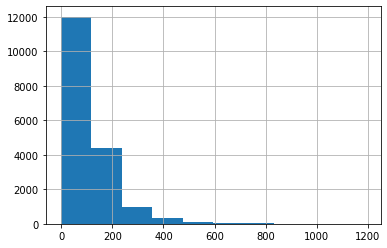

In [27]:
# Distribution of the skew of the integrated profile
# As can be seen, most recordings are greater than 0, statistically meaning the distribution for most
# recordings are not normal and not symmetrical
df_pulsar.DMSNR_skew.hist()
plt.show()

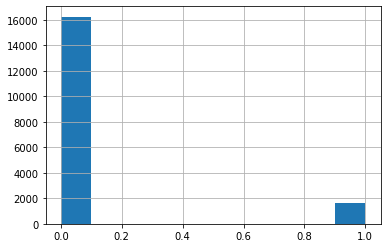

In [29]:
# As we can see, there are a lot more falses than positives in this dataset. May end up skewing results when all is
# said and done
df_pulsar.target.hist()
plt.show()

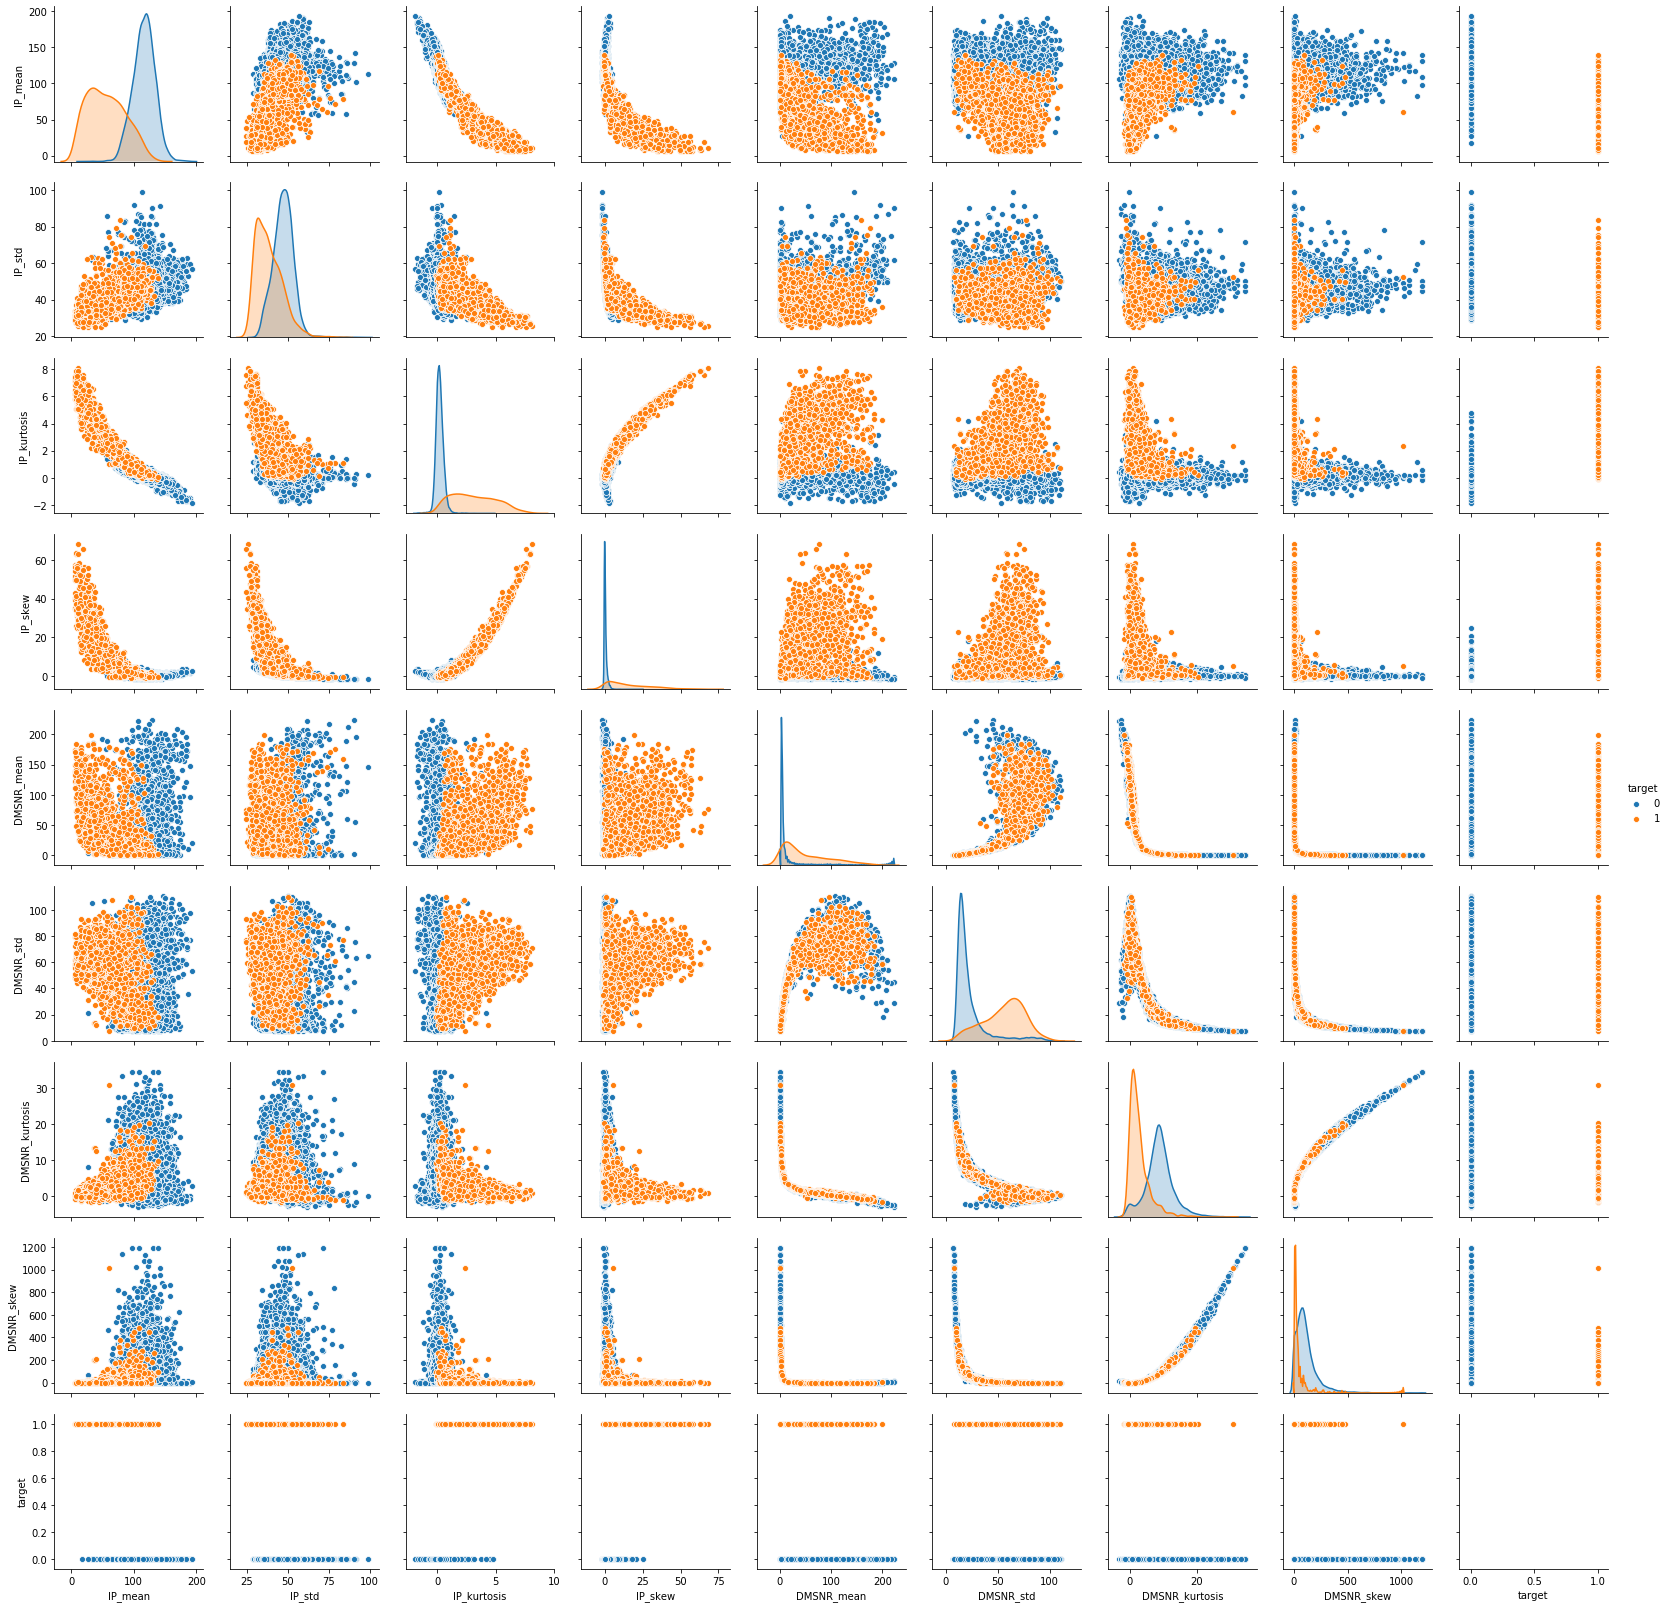

In [31]:
# As can be seen in the pairplot, the targets are grouped pretty well together. This may influence what 
# classifiers and regression models would be best for this project
sns.pairplot(df_pulsar, hue="target")
plt.show()

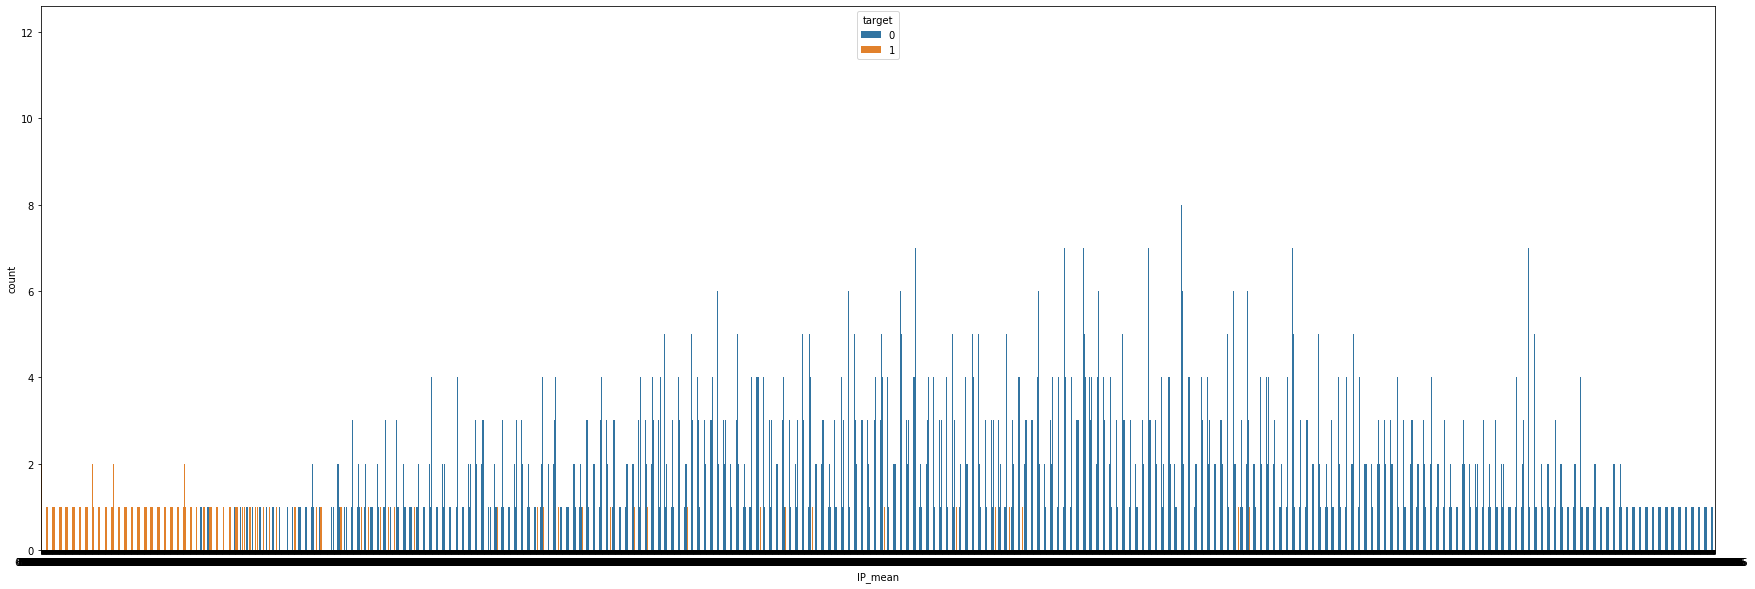

In [7]:
plt.figure(figsize=(30,10))
sns.countplot(df_pulsar.IP_mean, hue="target", data=df_pulsar)
plt.show()

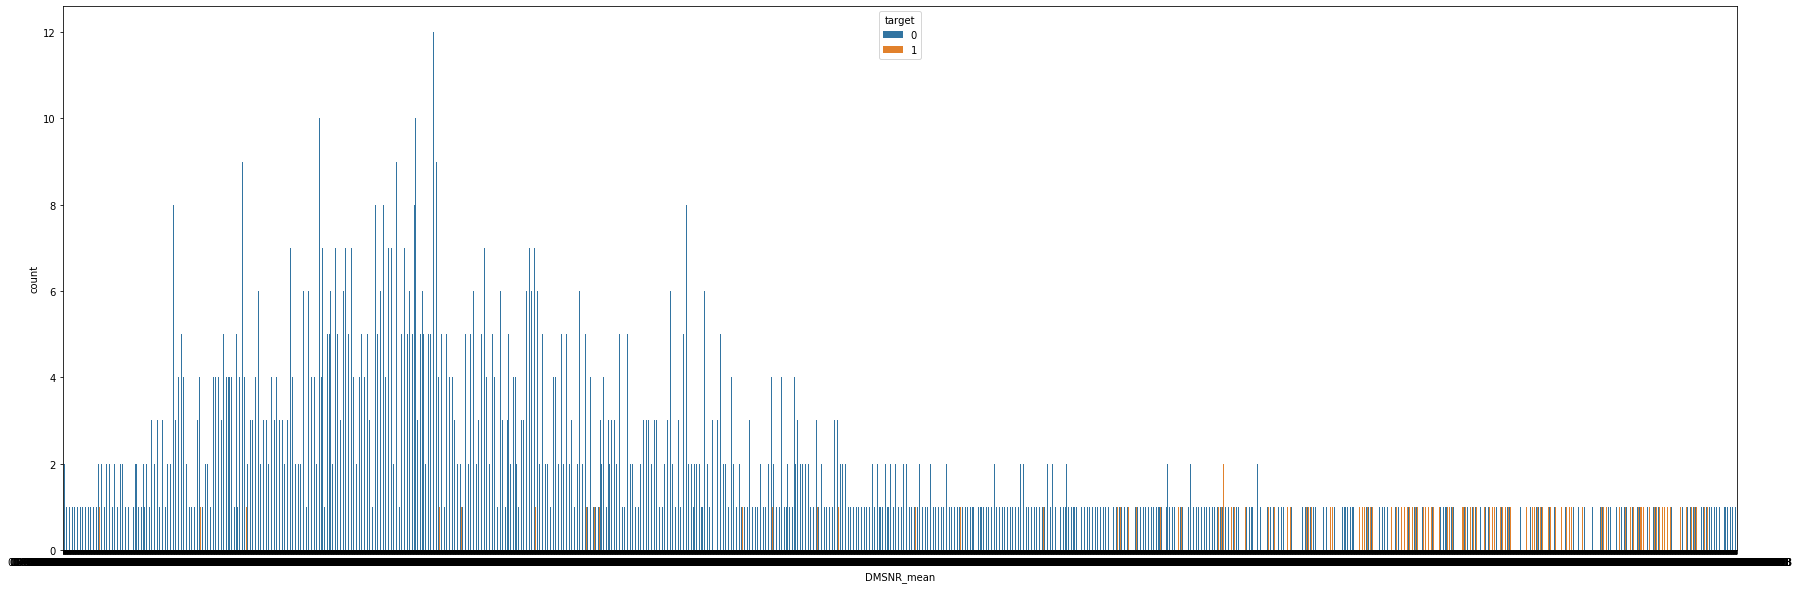

In [10]:
# Interesting to see how the DM_SNR mean count is almost the opposite of the integrated profile when it comes
# to where the targets are located
plt.figure(figsize=(30,10))
sns.countplot(df_pulsar.DMSNR_mean, hue="target", data=df_pulsar)
plt.show()

## Predicting Pulsars

#### Setting up the models for training and testing

In [5]:
X = df_pulsar.drop("target", axis=1)
y = df_pulsar[["target"]]

X, y = utils.shuffle(X, y, random_state = 0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.7, random_state = 0)

y_train_bin = pd.get_dummies(y_train['target'])
y_test_bin = pd.get_dummies(y_test['target'])

display(y_train.head())
display(y_test.head())
display(X_train.head())
display(X_test.head())

,target
5728,1
17680,0
157,0
8105,0
14120,0


,target
13080,0
12717,0
8467,0
1902,0
1289,0


,IP_mean,IP_std,IP_kurtosis,IP_skew,DMSNR_mean,DMSNR_std,DMSNR_kurtosis,DMSNR_skew
5728,12.765625,31.970075,5.879499,35.613467,24.607023,48.900394,2.374916,5.515552
17680,110.593750,45.820717,0.621979,0.512167,1.389632,16.538402,12.816714,168.613759
157,94.757812,39.527235,0.785766,1.437366,2.275920,15.656293,9.990956,122.035398
8105,106.359375,45.896237,0.534598,0.307445,10.414716,39.499612,3.841495,13.878201
14120,78.710938,36.717280,0.917623,2.857578,5.185619,26.092208,5.836288,37.082787


,IP_mean,IP_std,IP_kurtosis,IP_skew,DMSNR_mean,DMSNR_std,DMSNR_kurtosis,DMSNR_skew
13080,106.117188,49.310658,0.397167,-0.188747,2.433946,17.578581,8.610050,83.484608
12717,142.226562,54.201046,-0.282401,-0.203532,1.091973,12.529693,14.070147,222.670016
8467,111.296875,38.078529,0.296122,1.115946,1.448161,12.914492,13.078862,203.978636
1902,126.117188,49.652483,-0.110294,0.038250,3.512542,20.306160,7.331779,60.894902
1289,120.492188,51.905412,0.269489,-0.042289,2.297659,15.504774,9.840713,118.400495


#### Setting a baseline with linear regression model

In [21]:

kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_reg = LinearRegression()
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_reg.fit(X_train_fold, y_train_fold)
    y_pred = clf_reg.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["target"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(metrics.confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results["pred"].values.astype("int"))))
display(df_results.head())

,0,1
0,16256,3
1,1218,421


Accuracy score: 0.9317800871605766


,y_test,pred
0,0.0,0.064686
1,0.0,-0.015274
2,0.0,0.072629
3,0.0,-0.017004
4,0.0,0.077778


#### Decision Tree Classifier

In [22]:
'''
Best params for DTC:

criterion: gini
max_depth: 2
min_samples_leaf: 1
min_samples_splt: 2
'''

param_grid = {
    'criterion' : ['gini', 'entropy'], 
    "max_depth": [2,6,10,15], 
    "min_samples_split":[4,5,7,10,15],
    "min_samples_leaf":[1,3,5,10] }
grid_rf = GridSearchCV(DecisionTreeClassifier(),  param_grid, return_train_score=True,scoring=["accuracy"],refit="accuracy", cv=5) 
grid_result = grid_rf.fit(X_train, y_train)
grid_df = pd.DataFrame(grid_result.cv_results_)
grid_df.sort_values(["mean_test_accuracy"], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.012633,0.003463,0.001585,0.000699,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.973953,...,0.976159,0.002799,1,0.977643,0.97858,0.976251,0.978352,0.978352,0.977836,0.000852
8,0.009714,0.000810,0.001421,0.000392,gini,2,3,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.973953,...,0.976159,0.002799,1,0.977643,0.97858,0.976251,0.978352,0.978352,0.977836,0.000852
1,0.011711,0.001899,0.001012,0.000010,gini,2,1,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.973953,...,0.976159,0.002799,1,0.977643,0.97858,0.976251,0.978352,0.978352,0.977836,0.000852
13,0.009149,0.000359,0.000974,0.000116,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.973953,...,0.976159,0.002799,1,0.977643,0.97858,0.976251,0.978352,0.978352,0.977836,0.000852
12,0.010004,0.000892,0.001020,0.000068,gini,2,5,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.973953,...,0.976159,0.002799,1,0.977643,0.97858,0.976251,0.978352,0.978352,0.977836,0.000852


In [28]:
# Pretty good results. Above 90 for both 1s and 0s
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=4, min_samples_leaf=1)
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_tree.fit(X_train_fold, y_train_fold)
    y_pred = clf_tree.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["target"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(metrics.confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print(metrics.classification_report(df_results.y_test, df_results.pred))
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results.pred)))
display(df_results.head(10))

,0,1
0,16146,113
1,289,1350


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     16259
         1.0       0.92      0.82      0.87      1639

   micro avg       0.98      0.98      0.98     17898
   macro avg       0.95      0.91      0.93     17898
weighted avg       0.98      0.98      0.98     17898

Accuracy score: 0.9775393898759638


,y_test,pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


#### Support Vector Machine Classifier

In [26]:
# Pretty poor results. 1s are super low 
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_svc = SVC(C=3, kernel="rbf", gamma="auto")
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_svc.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred = clf_svc.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["target"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(metrics.confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print(metrics.classification_report(df_results.y_test, df_results.pred))
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results.pred)))
display(df_results.head(10))

,0,1
0,16202,57
1,1514,125


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     16259
         1.0       0.69      0.08      0.14      1639

   micro avg       0.91      0.91      0.91     17898
   macro avg       0.80      0.54      0.55     17898
weighted avg       0.89      0.91      0.88     17898

Accuracy score: 0.9122248295898984


,y_test,pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


#### Clustering: KMeans

In [27]:
'''
Best params for KMeans:

algorithm: full
init: k-means++
n_cluster: 2
n_init: 5
'''

param_grid = {
    'n_clusters':[2,4,8,12,16], 
    "init":["k-means++","random"], 
    "n_init":[5,10,15],
    "algorithm":["auto", "full", "elkan"]
    }
grid_rf = GridSearchCV(KMeans(),  param_grid, return_train_score=True,scoring=["accuracy"],refit="accuracy", cv=5) 
grid_result = grid_rf.fit(X_train, y_train)
grid_df = pd.DataFrame(grid_result.cv_results_)
grid_df.sort_values(["mean_test_accuracy"], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_n_clusters,param_n_init,params,split0_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
30,0.066427,0.007148,0.001261,0.000037,full,k-means++,2,5,"{'algorithm': 'full', 'init': 'k-means++', 'n_...",0.783054,...,0.764202,0.009843,1,0.759953,0.761118,0.766705,0.764610,0.766294,0.763736,0.002731
61,0.076159,0.007337,0.001529,0.000416,elkan,k-means++,2,10,"{'algorithm': 'elkan', 'init': 'k-means++', 'n...",0.783054,...,0.764016,0.009920,2,0.759953,0.761118,0.766705,0.764610,0.766294,0.763736,0.002731
46,0.135851,0.012554,0.001291,0.000018,full,random,2,10,"{'algorithm': 'full', 'init': 'random', 'n_clu...",0.783054,...,0.662507,0.208545,3,0.759953,0.761118,0.766705,0.236787,0.766294,0.658172,0.210710
2,0.115437,0.013602,0.001556,0.000436,auto,k-means++,2,15,"{'algorithm': 'auto', 'init': 'k-means++', 'n_...",0.783054,...,0.659713,0.210462,4,0.762747,0.761118,0.233295,0.764610,0.766294,0.657613,0.212166
32,0.188118,0.016222,0.001427,0.000209,full,k-means++,2,15,"{'algorithm': 'full', 'init': 'k-means++', 'n_...",0.216946,...,0.650959,0.217050,5,0.240047,0.761118,0.766705,0.764610,0.766294,0.659755,0.209863


In [29]:
# Terrible results
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_kmeans = KMeans(algorithm="full", n_clusters=2, n_init=5, init="k-means++")
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_kmeans.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred = clf_kmeans.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["target"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(metrics.confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print(metrics.classification_report(df_results.y_test, df_results.pred))
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results.pred)))
display(df_results.head(10))

,0,1
0,11429,4830
1,1297,342


              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79     16259
         1.0       0.07      0.21      0.10      1639

   micro avg       0.66      0.66      0.66     17898
   macro avg       0.48      0.46      0.44     17898
weighted avg       0.82      0.66      0.73     17898

Accuracy score: 0.6576712481841547


,y_test,pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,1.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


#### Random Forest Classifier

In [30]:
'''
Best params for RFC

criterion: gini
max_depth: 10
min_samples_split: 10
min_samples_leaf: 1
n_estimators: 50
'''
param_grid = {
    'criterion' : ['gini', 'entropy'], 
    "max_depth": [2,6,10,15], 
    "min_samples_split":[5,7,10],
    "min_samples_leaf":[1,3,5],
    "n_estimators": [50,100] }
grid_rf = GridSearchCV(RandomForestClassifier(),  param_grid, return_train_score=True,scoring=["accuracy"],refit="accuracy", cv=5) 
grid_result = grid_rf.fit(X_train, y_train.values.ravel())
grid_df = pd.DataFrame(grid_result.cv_results_)
grid_df.sort_values(["mean_test_accuracy"], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
40,0.264742,0.010962,0.008775,0.000644,gini,10,1,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.978953,0.002672,1,0.986493,0.985099,0.984168,0.985801,0.984404,0.985193,0.000865
43,0.514267,0.024481,0.018808,0.002898,gini,10,3,5,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.978581,0.003490,2,0.986260,0.985332,0.985099,0.985335,0.985102,0.985426,0.000430
60,0.258607,0.008507,0.008832,0.000268,gini,15,3,5,50,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",...,0.978581,0.002359,2,0.986027,0.985332,0.985332,0.984637,0.985335,0.985333,0.000440
61,0.522331,0.005522,0.017196,0.001498,gini,15,3,5,100,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",...,0.978394,0.002912,4,0.986726,0.985565,0.985099,0.985335,0.985568,0.985658,0.000561
104,0.261509,0.011857,0.008328,0.000653,entropy,6,5,7,50,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",...,0.978394,0.002971,4,0.983232,0.981607,0.979977,0.982076,0.981611,0.981701,0.001047


In [32]:
# Slightly better results than Decision Tree Classifier. Overall, good results
kfold = KFold(5, random_state = 100, shuffle = True)
df_results = pd.DataFrame([],columns=["y_test", "pred"])
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    clf_rfc = RandomForestClassifier(criterion="gini", max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50)
    X_train_fold = X_train_fold.fillna(X_train_fold.mean())
    X_test_fold = X_test_fold.fillna(X_test_fold.mean())
    clf_rfc.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred = clf_rfc.predict(X_test_fold)
    row = pd.DataFrame({"y_test": y_test_fold["target"].values.astype("float"), "pred": y_pred.ravel().astype("float")})
    df_results = df_results.append(row)

cm = pd.DataFrame(metrics.confusion_matrix(df_results["y_test"].values.astype("int"), df_results["pred"].values.astype("int")))
display(cm)
print(metrics.classification_report(df_results.y_test, df_results.pred))
print("Accuracy score: {}".format(metrics.accuracy_score(df_results.y_test, df_results.pred)))
display(df_results.head(10))

,0,1
0,16158,101
1,264,1375


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     16259
         1.0       0.93      0.84      0.88      1639

   micro avg       0.98      0.98      0.98     17898
   macro avg       0.96      0.92      0.94     17898
weighted avg       0.98      0.98      0.98     17898

Accuracy score: 0.9796066599620069


,y_test,pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [6]:
param_grid = {
    'opt' : ['adam', 'sgd'],
    'hiddenNum' : [10,15],
    'act' : ['relu', 'tanh'],
    'epochs': [10,12],
    'batch_size': [2,4]
}

grid = model_selection.GridSearchCV(KerasClassifier(build_fn=create_keras_model, verbose=0), param_grid, return_train_score=True, cv=5)
grid_result = grid.fit(X_train,y_train_bin)

In [11]:
grid_df = pd.DataFrame(grid_result.cv_results_)
grid_df.sort_values(["mean_test_score"], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_act,param_batch_size,param_epochs,param_hiddenNum,param_opt,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
30,49.425603,1.046729,2.412583,0.205792,tanh,4,12,15,adam,"{'act': 'tanh', 'batch_size': 4, 'epochs': 12,...",...,0.974111,0.001233,1,0.970664,0.975320,0.973690,0.973225,0.974628,0.973505,0.001596
20,68.216136,2.082967,1.954155,0.114083,tanh,2,12,10,adam,"{'act': 'tanh', 'batch_size': 2, 'epochs': 12,...",...,0.973552,0.002802,2,0.972293,0.972759,0.973690,0.975087,0.973929,0.973552,0.000973
16,63.362886,0.535974,1.906776,0.053301,tanh,2,10,10,adam,"{'act': 'tanh', 'batch_size': 2, 'epochs': 10,...",...,0.972621,0.003363,3,0.972992,0.974622,0.971828,0.973923,0.972300,0.973133,0.001026
22,72.987925,0.675351,2.158990,0.081939,tanh,2,12,15,adam,"{'act': 'tanh', 'batch_size': 2, 'epochs': 12,...",...,0.971876,0.002234,4,0.975087,0.974156,0.970664,0.969732,0.972533,0.972434,0.002022
18,57.367573,6.119972,1.843692,0.132909,tanh,2,10,15,adam,"{'act': 'tanh', 'batch_size': 2, 'epochs': 10,...",...,0.971689,0.003798,5,0.968335,0.974389,0.972526,0.976019,0.975093,0.973272,0.002722


In [27]:
kfold = model_selection.KFold(5, shuffle=True, random_state=100)
df_results = pd.DataFrame([], columns=["test", "pred"])
i = 1
for train, test in kfold.split(X):
    print("Starting fold #{}".format(i))
    X_train, X_test = X.loc[train], X.loc[test]
    y_train, y_test = y.loc[train], y.loc[test]
    y_train_dum = pd.get_dummies(y_train)
    y_test_dum = pd.get_dummies(y_test)
    clf = KerasClassifier(build_fn=create_keras_model, verbose=0, epochs=12, batch_size=4, hiddenNum=15, act='tanh')
    clf.fit(X_train, y_train_dum)
    y_pred_test = clf.predict(X_test)
    y_test = y_test["target"]
    row = pd.DataFrame({"test": y_test, "pred": y_pred_test})
    df_results = df_results.append(row)
    print("Completed fold #{}".format(i))
    i+=1

Starting fold #1


Exception: Data must be 1-dimensional

## Functions

In [26]:
def create_keras_model(opt='adam', act='relu', hiddenNum=10):
    model = Sequential()
    model.add(Dense(hiddenNum, input_shape=(8,)))
    model.add(Activation(act))
    model.add(Dense(1))
    model.add(Activation('softmax'))
    model.compile(optimizer=opt, loss="mean_squared_error", metrics=["accuracy"])
    return model